<h1><center><u> CodeClause Data Science Internship </u></center></h1>

### Name - Sanket M. Bairagi 
#### Task 1 - Sales Analysis
Dataset Link - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

# Introduction -
In this Notebook i am going to analys Sales of Supermarket store.
Every store be it online or offline needs evaluation and analysis to predict daily sales and know what goods customers want at a particular time and what the trend would be every day, month and year.

The major focus of this analysis is to understand the following:

Sales Trend. Most Selling Products by Number of Sales. Least Selling Product by Number of Sales. Most preferred Shipping Mode by Sales. Profitable Categories. Numbers of Product Sold by Category. Cities With Highest Sales Top Selling Products by Amount of Sales.


In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load and reading dataset
data=pd.read_csv("https://raw.githubusercontent.com/SanketBairagi/CodeClause_Sales_Analysis/main/superstore.csv")

In [3]:
#Shape Of Dataset
data.shape

(9800, 18)

dataset has 9800 rows and 18 columns.

In [4]:
# top 5 rows
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
# bottom 5 rows
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [6]:
# Columns Of Dataset
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
# Finding Null/missing values in Data
data.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

in dataset postal code columns has null / missing values.

In [8]:
# fixing Null values.
data["Postal Code"].mode(dropna=True)

0    10035.0
Name: Postal Code, dtype: float64

In [9]:
# replacing null value by 10035.0
data.replace(np.nan,10035.0,inplace=True)

In [10]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Null/missing values is fixed.

In [11]:
# checking Dublicate Values
data.duplicated().sum()

0

No dublicate values found in Data

In [12]:
# Data Types of columns in Dataset
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [13]:
data["Order Date"]=pd.to_datetime(data["Order Date"])

Order Date is converted to datetime formate

In [14]:
# All Information About Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [15]:
#Dropping Unnessesory columns
data=data.drop(["Row ID","Order ID","Product ID","Country","Postal Code"],axis=1)

In [16]:
data.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [17]:
# Top 10 Customer Details who ordered /purchesed products.
pd.DataFrame(data.groupby(["Customer Name","Customer ID",'State','City']).Sales.sum().sort_values(ascending = False).head(10))

,,,,Sales
Customer Name,Customer ID,State,City,
Sean Miller,SM-20320,Florida,Jacksonville,23661.228
Tamara Chand,TC-20980,Indiana,Lafayette,18336.740
Raymond Buch,RB-19360,Washington,Seattle,14052.480
Tom Ashbrook,TA-21385,New York,New York City,13723.498
Becky Martin,BM-11140,Texas,San Antonio,10539.896
Hunter Lopez,HL-15040,Delaware,Newark,10499.970
Sanjit Chand,SC-20095,Minnesota,Minneapolis,9900.190
Adrian Barton,AB-10105,Michigan,Detroit,9892.740
Bill Shonely,BS-11365,New Jersey,Lakewood,9135.190


In [18]:
# Number of order shift through diffrent mode
pd.DataFrame(data['Ship Mode'].value_counts())

,Ship Mode
Standard Class,5859
Second Class,1902
First Class,1501
Same Day,538


Maximum product shifted through Standard Class.

In [19]:
# state Wise Sales.
pd.DataFrame(data.groupby("State").Sales.sum().astype(int).sort_values(ascending = False))

,Sales
State,
California,446306
New York,306361
Texas,168572
Washington,135206
Pennsylvania,116276
Florida,88436
Illinois,79236
Michigan,76136
Ohio,75130


Maximum sale done in California state
minimum sale done in North Dakota state.

In [20]:
# city wise Sales
pd.DataFrame(data.groupby("City").Sales.sum().head(50).astype(int).sort_values(ascending = False))

,Sales
City,
Arlington,20214
Atlanta,17197
Aurora,11656
Baltimore,6156
Austin,6057
Anaheim,5600
Alexandria,5519
Brentwood,5090
Bellingham,3790


maximum sale done in city Arlington.
Minimum Sale done in ciry Abilene.

In [21]:
# region wise sales.
pd.DataFrame(data.groupby("Region").Sales.sum().head(20).astype(int).sort_values(ascending = False))

,Sales
Region,
West,710219
East,669518
Central,492646
South,389151


Maximum Sale done in West region

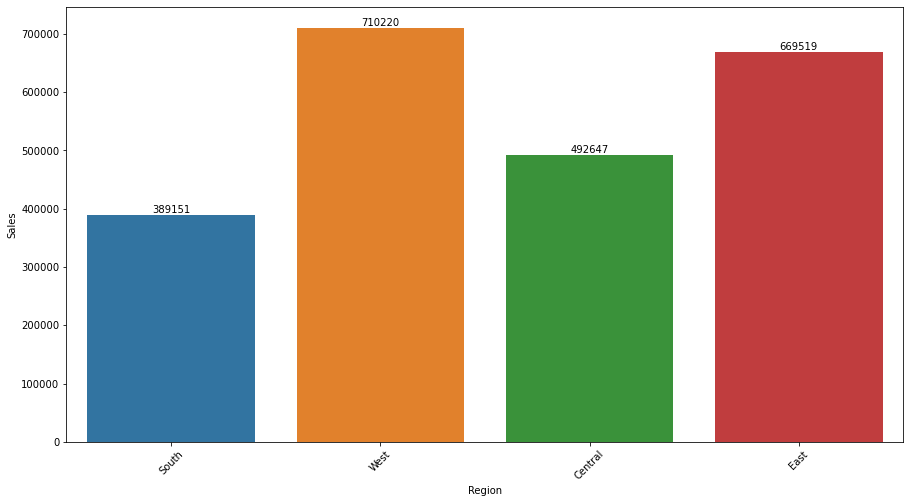

In [22]:

plt.figure(figsize=(15,8))
ax = sns.barplot(x = data.Region, y = data.Sales, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
plt.xticks(rotation = 45);
plt.show()

In [23]:
# Category wise sales.
pd.DataFrame(data.groupby("Category").Sales.sum().astype(int).sort_values(ascending = False))

,Sales
Category,
Technology,827455
Furniture,728658
Office Supplies,705422


Technology Category has maximum sale

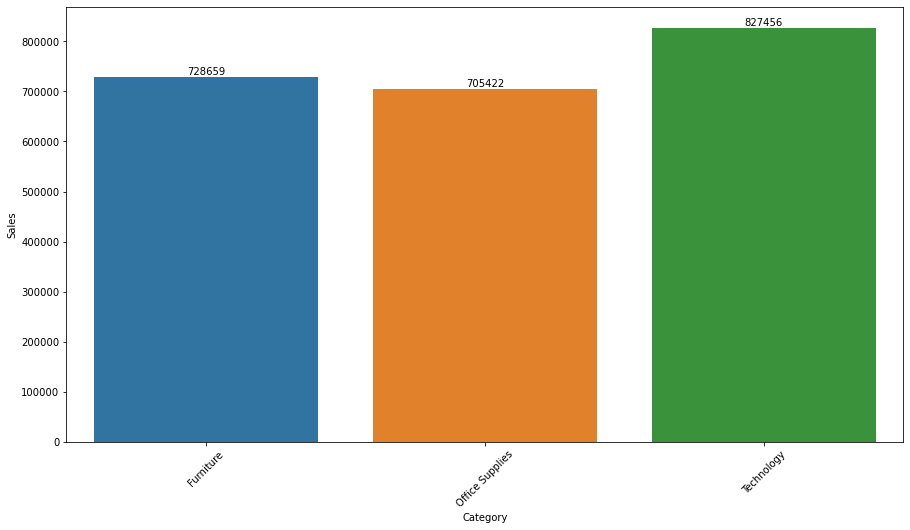

In [24]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x = data.Category, y = data.Sales, estimator=np.sum, ci = None)
plt.bar_label(ax.containers[0])
plt.xticks(rotation = 45);

In [25]:
# Subcategory wise sales.
SubCat=pd.DataFrame(data.groupby("Sub-Category").Sales.sum().astype(int).sort_values(ascending = False))
SubCat

,Sales
Sub-Category,
Phones,327782
Chairs,322822
Storage,219343
Tables,202810
Binders,200028
Machines,189238
Accessories,164186
Copiers,146248
Bookcases,113813


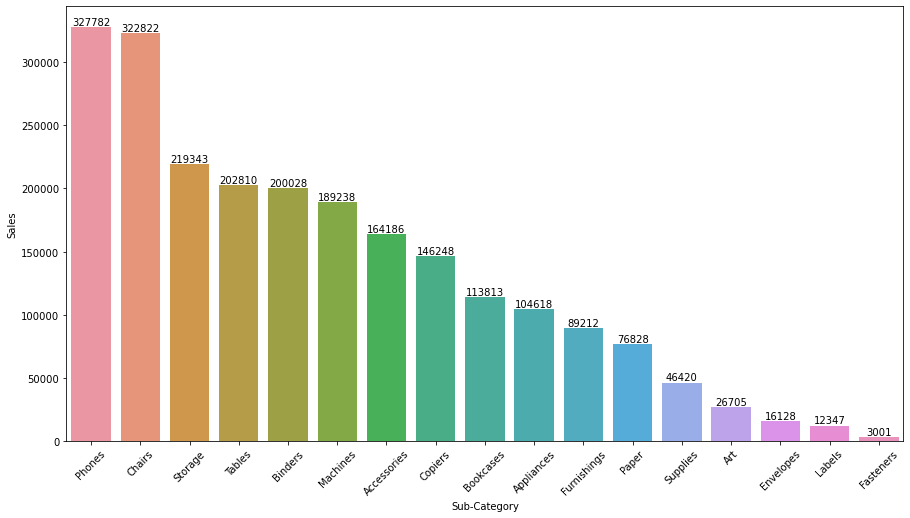

In [26]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=SubCat.index,y="Sales",data=SubCat, ci = None)
plt.bar_label(ax.containers[0])
plt.xticks(rotation = 45);

phone has maximum sales.

In [27]:
# segment wise sales.
pd.DataFrame(data.groupby("Segment").Sales.sum().astype(int))

,Sales
Segment,
Consumer,1148060
Corporate,688494
Home Office,424982


Consumer has maximum sales.

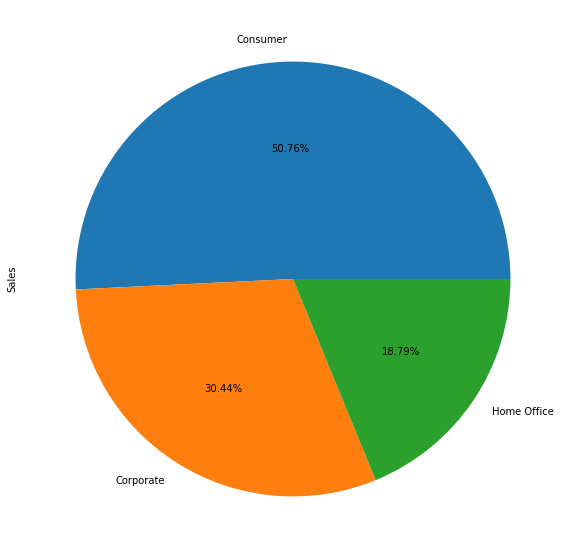

In [28]:
data.groupby("Segment").Sales.sum().plot(kind = "pie",
                                      figsize = (12,10),
                                      autopct = "%.2f%%");

In [29]:
# yearly sale
YSale=pd.DataFrame(data.groupby(data["Order Date"].dt.year)["Sales"].sum())
YSale=YSale.reset_index()

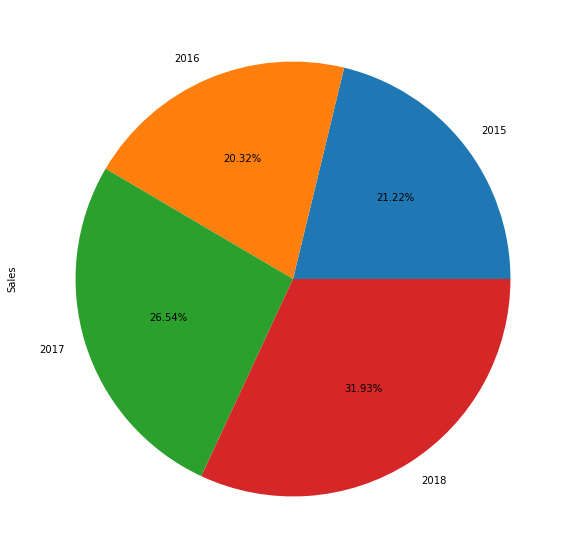

In [30]:
YSale.groupby("Order Date").Sales.sum().plot(kind = "pie",
                                      figsize = (12,10),
                                      autopct = "%.2f%%");

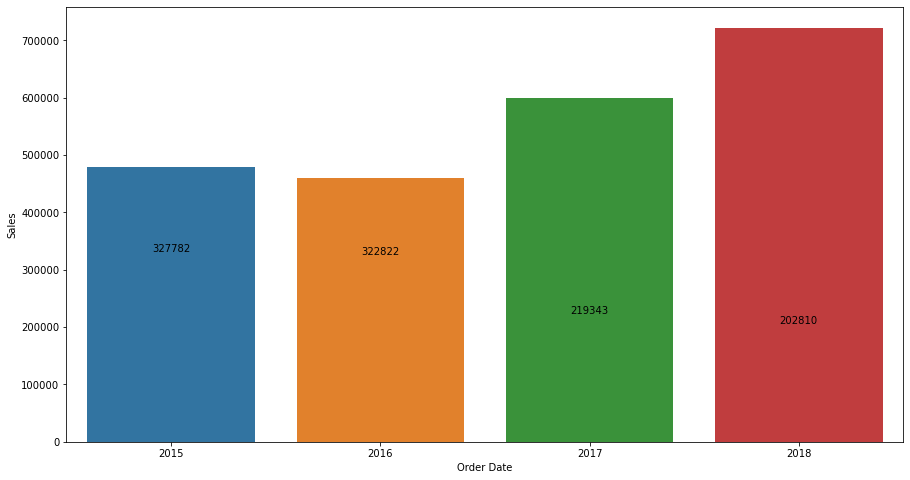

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=YSale,x="Order Date",y="Sales")
plt.bar_label(ax.containers[0])
plt.show()

Sales is increses with the years.

In [32]:
Data= data
Data['year'] = pd.DatetimeIndex(Data["Order Date"]).year
Data['month'] = pd.DatetimeIndex(Data["Order Date"]).month
Data.head(3)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,year,month
0,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2017-08-11,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8
2,2017-12-06,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,12


In [33]:
# month year and month wise Sales
YMSales=pd.DataFrame(Data.groupby(["year","month"]).Sales.sum())
YMSales

Sales
year month            
2015 1      28828.2540
     2      12588.4840
     3      54027.6920
     4      24710.0160
     5      29520.4900
     6      29181.3346
     7      35194.5580
     8      37349.2655
     9      65956.3998
     10     34561.9470
     11     64369.4565
     12     63568.3107
2016 1      29347.3864
     2      20728.3520
     3      34489.6776
     4      38056.9685
     5      30761.5585
     6      28515.9082
     7      28573.3100
     8      49076.9300
     9      65352.9970
     10     31631.8890
     11     50009.1450
     12     52891.8832
2017 1      38048.1840
     2      48907.5900
     3      48990.1410
     4      42368.0480
     5      64836.2518
     6      37424.6810
     7      41761.9430
     8      45766.8144
     9      40692.3063
     10     52156.9580
     11     66392.5470
     12     72847.0855
2018 1      59767.0910
     2      48928.8334
     3      74748.6238
     4      37849.2156
     5      40882.4464
     6      46912.8475
     7      53942.7755
     8      75408.7840
     9      73153.3640
     10     65501.1622
     11     87997.6400
     12     56959.2358

In [34]:
# year and month of Maximum sale.
print(YMSales[YMSales.Sales==YMSales.Sales.max()])

               Sales
year month          
2018 11     87997.64


In [35]:
# year and month of Minimum sale.
print(YMSales[YMSales.Sales==YMSales.Sales.min()])

                Sales
year month           
2015 2      12588.484


In [36]:
# yearly region wise sales
YRSale=pd.DataFrame(Data.groupby(["year","Region"]).Sales.sum())
YRSale

Sales
year Region              
2015 Central  102920.5206
     East     127652.8190
     South    103374.9055
     West     145907.9630
2016 Central  102425.1724
     East     153225.1830
     South     70076.0825
     West     133709.5675
2017 Central  145673.8800
     East     178511.5380
     South     93535.9035
     West     182471.2285
2018 Central  141627.3402
     East     210129.1860
     South    122164.5675
     West     248130.9255

In [37]:
# year and region of Maximum sale.
print(YRSale[YRSale.Sales==YRSale.Sales.max()])

                   Sales
year Region             
2018 West    248130.9255


In [38]:
# year and Region of Minimum sale.
print(YRSale[YRSale.Sales==YRSale.Sales.min()])

                  Sales
year Region            
2016 South   70076.0825


In [39]:
# yearly state wise sales.
YStateSale=pd.DataFrame(Data.groupby(["year","State"]).Sales.sum())
YStateSale

Sales
year State                   
2015 Alabama         6139.090
     Arizona         8295.235
     Arkansas        6302.690
     California     89475.149
     Colorado        6502.294
...                       ...
2018 Vermont          842.210
     Virginia        7600.200
     Washington     65539.896
     West Virginia   1209.824
     Wisconsin       5567.470

[181 rows x 1 columns]

In [40]:
# year and state of Maximum sale.
print(YStateSale[YStateSale.Sales==YStateSale.Sales.max()])

                       Sales
year State                  
2018 California  144666.7685


In [41]:
# year and State of Minimum sale.
print(YStateSale[YStateSale.Sales==YStateSale.Sales.min()])

                 Sales
year State            
2017 New Mexico  64.08


In [42]:
#year and Segment wise sales.
YSegSale=pd.DataFrame(Data.groupby(["year","Segment"]).Sales.sum())
YSegSale

Sales
year Segment                 
2015 Consumer     262956.8006
     Corporate    127797.4957
     Home Office   89101.9118
2016 Consumer     265356.2933
     Corporate    119675.5989
     Home Office   74404.1132
2017 Consumer     291142.9652
     Corporate    204977.3178
     Home Office  104072.2670
2018 Consumer     328604.4719
     Corporate    236043.6624
     Home Office  157403.8849

In [43]:
# year and segment of Minimum sale.
print(YSegSale[YSegSale.Sales==YSegSale.Sales.max()])

                     Sales
year Segment              
2018 Consumer  328604.4719


In [44]:
# year and sgement of Minimum sale.
print(YSegSale[YSegSale.Sales==YSegSale.Sales.min()])

                       Sales
year Segment                
2016 Home Office  74404.1132


In [45]:
# year and category wise Sale
YCatSale=pd.DataFrame(Data.groupby(["year","Category"]).Sales.sum())
YCatSale

Sales
year Category                    
2015 Furniture        156477.8811
     Office Supplies  149512.8200
     Technology       173865.5070
2016 Furniture        164053.8674
     Office Supplies  133124.4070
     Technology       162257.7310
2017 Furniture        195813.0400
     Office Supplies  182417.5660
     Technology       221961.9440
2018 Furniture        212313.7872
     Office Supplies  240367.5410
     Technology       269370.6910

In [46]:
# year and Category of Maximum sale.
print(YCatSale[YCatSale.Sales==YCatSale.Sales.max()])

                      Sales
year Category              
2018 Technology  269370.691


In [47]:
# year and category of Minimum sale.
print(YCatSale[YCatSale.Sales==YCatSale.Sales.min()])

                           Sales
year Category                   
2016 Office Supplies  133124.407


In [48]:
# year and sub-category wise Sale
YSubCatSale=pd.DataFrame(Data.groupby(["year","Sub-Category"]).Sales.sum())
YSubCatSale

Sales
year Sub-Category             
2015 Accessories    23766.3960
     Appliances     15160.7150
     Art             5897.5340
     Binders        43263.2670
     Bookcases      20036.6776
...                        ...
2018 Paper          27504.7760
     Phones        104685.6580
     Storage        68072.7020
     Supplies       15952.1100
     Tables         60893.5425

[68 rows x 1 columns]

In [49]:
# year and Sub-Category of Maximum sale.
print(YSubCatSale[YSubCatSale.Sales==YSubCatSale.Sales.max()])

                        Sales
year Sub-Category            
2018 Phones        104685.658


In [50]:
# year and ssub-Category of Minimum sale.
print(YSubCatSale[YSubCatSale.Sales==YSubCatSale.Sales.min()])

                     Sales
year Sub-Category         
2016 Fasteners     545.224


# Thank You.